Tokenización:

Word Tokenization: Dividir el texto en palabras.
Sentence Tokenization: Dividir el texto en oraciones.

In [ ]:
#pip install bs4

In [5]:
#pip install spacy

In [6]:
#pip install nltk

In [8]:
import nltk
from bs4 import BeautifulSoup
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [9]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Leer texto desde una URL

In [13]:
# Obtener el contenido HTML de la página web
response = urllib.request.urlopen('https://www.bbva.com/es/sostenibilidad/mujeres-cientificas-pioneras-en-la-historia-de-la-ciencia/')
html = response.read()
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text(strip=True)
print(text)

Mujeres científicas: pioneras en la historia de la cienciaCerrar panelBBVA.com¿Qué estás buscando?Pulsar EnterBúsqueda PredictivaCerrar panelCerrar panelCerrar panelBBVA.comOpa Banco SabadellInnovaciónTransformaciónEmprendimientoTecnologíaDataBlockchainCiberseguridadEconomía y finanzasEconomíaFinanzasInformación corporativaResultadosSostenibilidadCompromisoEnergíaMovilidadPlanetaSocialAlimentaciónEconomía circularInfraestructurasSalud financieraControl de gastosManejar la deudaAhorrar mejorPlanificar para el futuroJuntosEducación y conocimientoCambio climático y biodiversidadInvestigación y saludInclusión e iniciativas solidariasPodcastCaso CenytAnálisis y OpiniónGastronomía SostenibleLas calculadoras de BBVACalculadora de ahorro en Aire AcondicionadoCalculadora de ahorro en calefacciónCalculadora 50/30/20Resultados BBVAInformación corporativaInformación financieraCalendario financieroAprendemos JuntosÚltimas noticiasNewslettersDescargar monográficosBBVA PodcastEspecialesSala de prensa

In [14]:
# Crear tokens por palabras
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text, "spanish")
tokens = [word.lower() for word in tokens if word.isalpha()]
print(tokens)

['mujeres', 'científicas', 'pioneras', 'en', 'la', 'historia', 'de', 'la', 'cienciacerrar', 'estás', 'buscando', 'pulsar', 'enterbúsqueda', 'predictivacerrar', 'panelcerrar', 'panelcerrar', 'banco', 'sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomía', 'y', 'finanzaseconomíafinanzasinformación', 'corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomía', 'circularinfraestructurassalud', 'financieracontrol', 'de', 'gastosmanejar', 'la', 'deudaahorrar', 'mejorplanificar', 'para', 'el', 'futurojuntoseducación', 'y', 'conocimientocambio', 'climático', 'y', 'biodiversidadinvestigación', 'y', 'saludinclusión', 'e', 'iniciativas', 'solidariaspodcastcaso', 'cenytanálisis', 'y', 'opinióngastronomía', 'sosteniblelas', 'calculadoras', 'de', 'bbvacalculadora', 'de', 'ahorro', 'en', 'aire', 'acondicionadocalculadora', 'de', 'ahorro', 'en', 'calefaccióncalculadora', 'bbvainformación', 'corporativainformación', 'financier

In [15]:
# Verificar frecuencia de palabras
freq = nltk.FreqDist(tokens)
for key, val in freq.items():
    print(f'{key}: {val}')

mujeres: 16
científicas: 9
pioneras: 4
en: 93
la: 140
historia: 8
de: 239
cienciacerrar: 1
estás: 1
buscando: 2
pulsar: 1
enterbúsqueda: 1
predictivacerrar: 1
panelcerrar: 2
banco: 4
sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomía: 1
y: 82
finanzaseconomíafinanzasinformación: 2
corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomía: 1
circularinfraestructurassalud: 1
financieracontrol: 2
gastosmanejar: 2
deudaahorrar: 2
mejorplanificar: 2
para: 18
el: 83
futurojuntoseducación: 1
conocimientocambio: 2
climático: 2
biodiversidadinvestigación: 2
saludinclusión: 2
e: 9
iniciativas: 2
solidariaspodcastcaso: 2
cenytanálisis: 1
opinióngastronomía: 1
sosteniblelas: 1
calculadoras: 1
bbvacalculadora: 1
ahorro: 2
aire: 1
acondicionadocalculadora: 1
calefaccióncalculadora: 1
bbvainformación: 3
corporativainformación: 1
financieracalendario: 1
financieroaprendemos: 2
juntosúltimas: 2
noticiasnewslettersdescargar: 

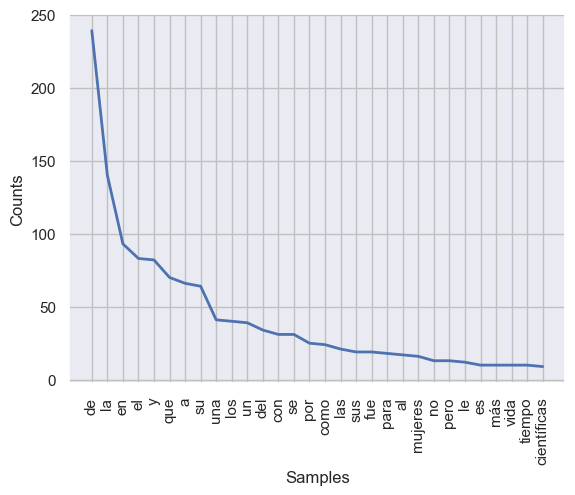

In [16]:
# Visualizar Tokens
sns.set()
freq.plot(30, cumulative=False)
plt.show()

# Eliminar palabras de Parada

In [17]:
# Eliminar palabras de parada
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
clean_tokens = [token for token in tokens if token not in stop_words]

In [18]:
print(clean_tokens)

['mujeres', 'científicas', 'pioneras', 'historia', 'cienciacerrar', 'buscando', 'pulsar', 'enterbúsqueda', 'predictivacerrar', 'panelcerrar', 'panelcerrar', 'banco', 'sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomía', 'finanzaseconomíafinanzasinformación', 'corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomía', 'circularinfraestructurassalud', 'financieracontrol', 'gastosmanejar', 'deudaahorrar', 'mejorplanificar', 'futurojuntoseducación', 'conocimientocambio', 'climático', 'biodiversidadinvestigación', 'saludinclusión', 'iniciativas', 'solidariaspodcastcaso', 'cenytanálisis', 'opinióngastronomía', 'sosteniblelas', 'calculadoras', 'bbvacalculadora', 'ahorro', 'aire', 'acondicionadocalculadora', 'ahorro', 'calefaccióncalculadora', 'bbvainformación', 'corporativainformación', 'financieracalendario', 'financieroaprendemos', 'juntosúltimas', 'noticiasnewslettersdescargar', 'monográficosbbva', 'podcastespe

In [19]:
# Verificar frecuencia de palabras limpias
freq_clean = nltk.FreqDist(clean_tokens)
for key, val in freq_clean.items():
    print(f'{key}: {val}')

mujeres: 16
científicas: 9
pioneras: 4
historia: 8
cienciacerrar: 1
buscando: 2
pulsar: 1
enterbúsqueda: 1
predictivacerrar: 1
panelcerrar: 2
banco: 4
sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomía: 1
finanzaseconomíafinanzasinformación: 2
corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomía: 1
circularinfraestructurassalud: 1
financieracontrol: 2
gastosmanejar: 2
deudaahorrar: 2
mejorplanificar: 2
futurojuntoseducación: 1
conocimientocambio: 2
climático: 2
biodiversidadinvestigación: 2
saludinclusión: 2
iniciativas: 2
solidariaspodcastcaso: 2
cenytanálisis: 1
opinióngastronomía: 1
sosteniblelas: 1
calculadoras: 1
bbvacalculadora: 1
ahorro: 2
aire: 1
acondicionadocalculadora: 1
calefaccióncalculadora: 1
bbvainformación: 3
corporativainformación: 1
financieracalendario: 1
financieroaprendemos: 2
juntosúltimas: 2
noticiasnewslettersdescargar: 2
monográficosbbva: 2
podcastespecialessala: 1
prensawebs: 

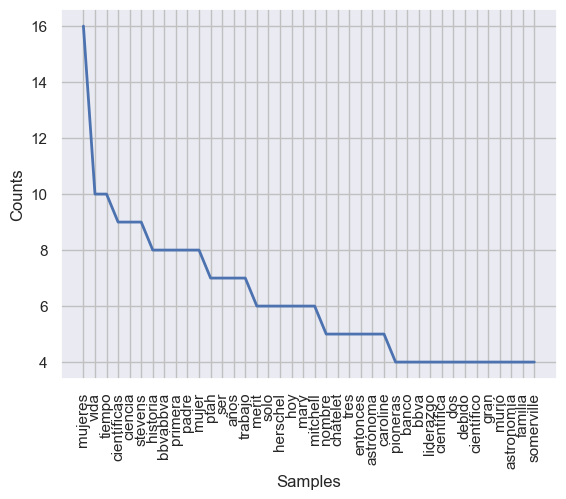

In [20]:
# Visualizar Tokens limpios
freq_clean.plot(40, cumulative=False)
plt.show()

Wordnet es una base de datos dentro de NTLK creada para el NPL incluye grupos de sinonimos y una breve definición.
#Los sinónimos permiten agrupar terminos similares para computar conjuntamente las frecuencia de palabras y clasificación
#Los antónimos permiten evaluar el contrapeso de cada palabra

# Obtener Sinónimos 

In [21]:
# Obtener Sinónimos utilizando NLTK WordNet
from nltk.corpus import wordnet
synonyms = []
for syn in wordnet.synsets('investigation'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['probe', 'investigation', 'investigation', 'investigating']


In [22]:
# Reemplazar tokens con sinónimos (opcionalmente)
for syn in synonyms:
    clean_tokens = [word.replace(syn, 'investigation') for word in clean_tokens]

In [23]:
# Reemplazar tokens con sinónimos manualmente
sinonimos = ['materia', 'masa']
for sin in sinonimos:
    clean_tokens = [word.replace(sin, 'materia') for word in clean_tokens]

In [24]:
# Recalcular frecuencia de palabras con sinónimos agregados
freq_clean_sin = nltk.FreqDist(clean_tokens)
for key, val in freq_clean_sin.items():
    print(f'{key}: {val}')

mujeres: 16
científicas: 9
pioneras: 4
historia: 8
cienciacerrar: 1
buscando: 2
pulsar: 1
enterbúsqueda: 1
predictivacerrar: 1
panelcerrar: 2
banco: 4
sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomía: 1
finanzaseconomíafinanzasinformación: 2
corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomía: 1
circularinfraestructurassalud: 1
financieracontrol: 2
gastosmanejar: 2
deudaahorrar: 2
mejorplanificar: 2
futurojuntoseducación: 1
conocimientocambio: 2
climático: 2
biodiversidadinvestigación: 2
saludinclusión: 2
iniciativas: 2
solidariaspodcastcaso: 2
cenytanálisis: 1
opinióngastronomía: 1
sosteniblelas: 1
calculadoras: 1
bbvacalculadora: 1
ahorro: 2
aire: 1
acondicionadocalculadora: 1
calefaccióncalculadora: 1
bbvainformación: 3
corporativainformación: 1
financieracalendario: 1
financieroaprendemos: 2
juntosúltimas: 2
noticiasnewslettersdescargar: 2
monográficosbbva: 2
podcastespecialessala: 1
prensawebs: 

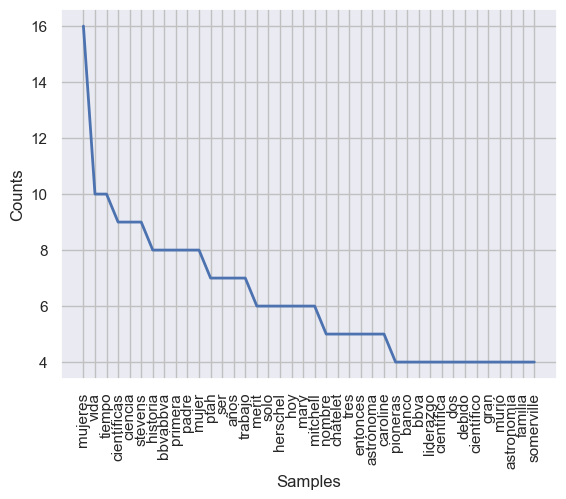

In [25]:
# Visualizar Tokens con sinónimos agregados
freq_clean_sin.plot(40, cumulative=False)
plt.show()

In [26]:
from nltk.corpus import wordnet
antonyms = []
for syn in wordnet.synsets("black"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['white', 'white', 'whiten', 'white', 'white']


La Derivación Regresiva con NLTK - Word Stemming:
- Se utiliza para encontrar la palabra raíz eliminando afijos(prefijos o sufijos)

In [27]:
from nltk.stem import PorterStemmer
stemmer =PorterStemmer()
print(stemmer.stem('eating'))

eat


In [29]:
#Derivación regresiva textos en español 
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')
print(spanish_stemmer.stem("trabajando")) 
print(spanish_stemmer.stem("trabajo"))

trabaj
trabaj


In [32]:
# Aplicar stemming a los tokens limpios con sinónimos
clean_tokens_sin_stems = [spanish_stemmer.stem(token) for token in clean_tokens]
print(clean_tokens_sin_stems)

['mujer', 'cientif', 'pioner', 'histori', 'cienciacerr', 'busc', 'puls', 'enterbusqued', 'predictivacerr', 'panelcerr', 'panelcerr', 'banc', 'sabadellinnovaciontransformacionemprendimientotecnologiadatablockchainciberseguridadeconom', 'finanzaseconomiafinanzasinform', 'corporativaresultadossostenibilidadcompromisoenergiamovilidadplanetasocialalimentacioneconom', 'circularinfraestructurassalud', 'financieracontrol', 'gastosmanej', 'deudaahorr', 'mejorplanific', 'futurojuntoseduc', 'conocimientocambi', 'climat', 'biodiversidadinvestig', 'saludinclusion', 'inici', 'solidariaspodcastcas', 'cenytanalisis', 'opiniongastronom', 'sosteniblel', 'calcul', 'bbvacalcul', 'ahorr', 'air', 'acondicionadocalcul', 'ahorr', 'calefaccioncalcul', 'bbvainform', 'corporativainform', 'financieracalendari', 'financieroaprend', 'juntosultim', 'noticiasnewslettersdescarg', 'monograficosbbv', 'podcastespecialessal', 'prensawebs', 'bbvabbv', 'mundocontactoatencion', 'client', 'redestrabaj', 'nosotrosreport', 'vul

mujer: 16
cientif: 22
pioner: 6
histori: 8
cienciacerr: 1
busc: 2
puls: 1
enterbusqued: 1
predictivacerr: 1
panelcerr: 2
banc: 7
sabadellinnovaciontransformacionemprendimientotecnologiadatablockchainciberseguridadeconom: 1
finanzaseconomiafinanzasinform: 2
corporativaresultadossostenibilidadcompromisoenergiamovilidadplanetasocialalimentacioneconom: 1
circularinfraestructurassalud: 1
financieracontrol: 2
gastosmanej: 2
deudaahorr: 2
mejorplanific: 2
futurojuntoseduc: 1
conocimientocambi: 2
climat: 2
biodiversidadinvestig: 2
saludinclusion: 2
inici: 2
solidariaspodcastcas: 2
cenytanalisis: 1
opiniongastronom: 1
sosteniblel: 1
calcul: 3
bbvacalcul: 1
ahorr: 2
air: 1
acondicionadocalcul: 1
calefaccioncalcul: 1
bbvainform: 3
corporativainform: 1
financieracalendari: 1
financieroaprend: 2
juntosultim: 2
noticiasnewslettersdescarg: 2
monograficosbbv: 2
podcastespecialessal: 1
prensawebs: 1
bbvabbv: 8
mundocontactoatencion: 2
client: 2
redestrabaj: 2
nosotrosreport: 2
vulnerabilidadescanal: 2


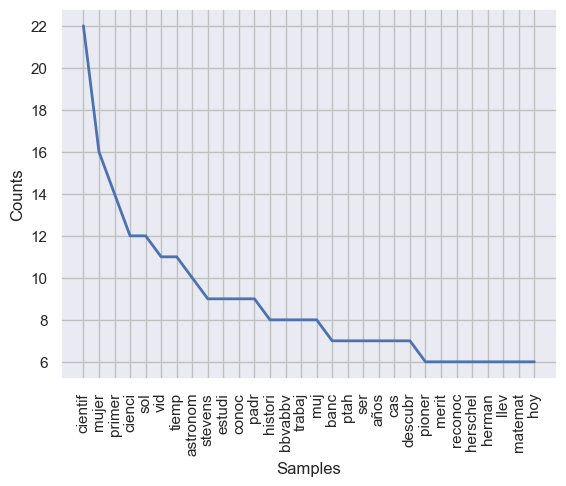

In [33]:
# Recalcular frecuencia de palabras con stemming
freq_clean_sin_stems = nltk.FreqDist(clean_tokens_sin_stems)
for key, val in freq_clean_sin_stems.items():
    print(f'{key}: {val}')
# Visualizar Tokens con stemming
freq_clean_sin_stems.plot(30, cumulative=False)
plt.show()

Lematizar= palabras es similar a la derivación regresiva, pero lo que hace es hallar el 
- lema correspondiente a partir de una forma flexionada (plural, verbo conjugado, femenino, masculino,...)
- la  diferencia es el que la lematización es el mundo real.

    Rapidez ->Derivacion
    
    Precisión -> Lematización

In [34]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
print(lemmatizer.lemmatize('working', pos="v")) #sustantivos de manera predeterminada, especificar "v" si se quieren los verbos

work


In [39]:
pip install -U pip setuptools wheel


  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.1.1
    Uninstalling setuptools-69.1.1:
      Successfully uninstalled setuptools-69.1.1
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.2 which is incompatible.


In [41]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [44]:
#Alternativa para texto en español Instalar spicy: conda install spacy
# Lematización con spaCy para textos en español
# Cargar el modelo de spaCy para español
#conda install -c conda-forge spacy
#python -m spacy download es_core_news_sm

nlp = spacy.load('es_core_news_sm')

In [45]:
# Lematizar tokens tras limpieza y convertidos los sinónimos
separator = ' '
clean_tokens_sin_lem = []
for token in nlp(separator.join(clean_tokens)):
    print(token.text, token.lemma_, token.pos_)
    clean_tokens_sin_lem.append(token.lemma_)

mujeres mujer NOUN
científicas científico ADJ
pioneras pionera NOUN
historia historio ADJ
cienciacerrar cienciacerrar VERB
buscando buscar VERB
pulsar pulsar VERB
enterbúsqueda enterbúsqueda NOUN
predictivacerrar predictivacerrar VERB
panelcerrar panelcerrar VERB
panelcerrar panelcerrar VERB
banco banco PROPN
sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomía sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomir VERB
finanzaseconomíafinanzasinformación finanzaseconomíafinanzasinformación NOUN
corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomía corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomir VERB
circularinfraestructurassalud circularinfraestructurassalud VERB
financieracontrol financieracontrol NOUN
gastosmanejar gastosmanejar VERB
deudaahorrar deudaahorrar VERB
mejorplanificar mejorplanificar VERB
futurojuntoseducaci

In [46]:
# Recalcular frecuencia de palabras lematizadas
freq_clean_sin_lem = nltk.FreqDist(clean_tokens_sin_lem)
for key, val in freq_clean_sin_lem.items():
    print(f'{key}: {val}')

mujer: 24
científico: 20
pionera: 6
historio: 4
cienciacerrar: 1
buscar: 2
pulsar: 1
enterbúsqueda: 1
predictivacerrar: 1
panelcerrar: 2
banco: 7
sabadellinnovacióntransformaciónemprendimientotecnologíadatablockchainciberseguridadeconomir: 1
finanzaseconomíafinanzasinformación: 2
corporativaresultadossostenibilidadcompromisoenergíamovilidadplanetasocialalimentacióneconomir: 1
circularinfraestructurassalud: 1
financieracontrol: 2
gastosmanejar: 2
deudaahorrar: 2
mejorplanificar: 2
futurojuntoseducación: 1
conocimientocambio: 2
climático: 2
biodiversidadinvestigación: 2
saludinclusión: 2
iniciativo: 2
solidariaspodcastcaso: 2
cenytanálisis: 1
opinióngastronomir: 1
sosteniblela: 1
calculadora: 1
bbvacalculadoro: 1
ahorro: 2
aire: 1
acondicionadocalculadoro: 1
calefaccióncalculadoro: 1
bbvainformación: 3
corporativainformación: 1
financieracalendario: 1
financieroaprendemos: 2
juntosúltima: 2
noticiasnewslettersdescargar: 2
monográficosbbva: 2
podcastespecialessalar: 1
prensawebs: 1
bbvabb

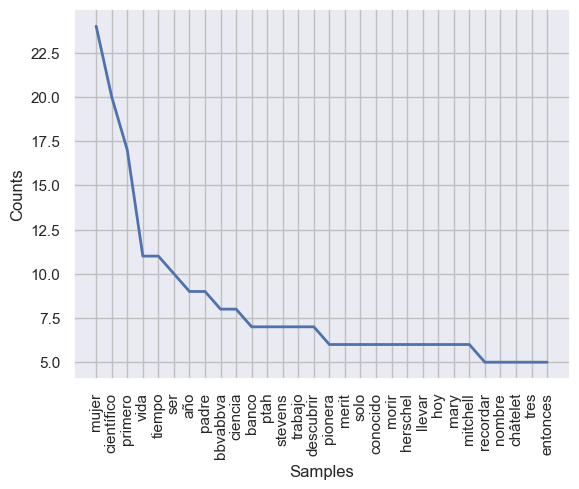

In [47]:
# Visualizar Tokens lematizados
freq_clean_sin_lem.plot(30, cumulative=False)
plt.show()

# FILTRO SPAM

In [48]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Descargar stopwords de NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

In [52]:
# Mostrar las primeras filas del conjunto de datos
print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [53]:
# Preprocesamiento de texto
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [54]:
data['processed_message'] = data['message'].apply(preprocess_text)

In [55]:
# Extracción de características
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['processed_message'])
y = data['label']


In [56]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
# Entrenamiento del modelo
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [58]:
# Predicciones
y_pred = model.predict(X_test)

In [59]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9700956937799043
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1448
        spam       1.00      0.78      0.87       224

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
[[1448    0]
 [  50  174]]


In [60]:
# Probar con nuevos datos
new_messages = ["Win a free iPhone now!", "Let's meet for lunch tomorrow."]
new_messages_processed = [preprocess_text(msg) for msg in new_messages]
new_X = tfidf.transform(new_messages_processed)
new_predictions = model.predict(new_X)
print("New Predictions:", new_predictions)

New Predictions: ['spam' 'ham']


Explicación de los pasos:
 Recolección de datos: Se carga un conjunto de datos de mensajes SMS etiquetados como spam o ham (no spam).

- Preprocesamiento de texto: Se tokenizan los mensajes, se convierten a minúsculas, se eliminan las palabras de parada y los caracteres no alfabéticos.

- Extracción de características: Se utiliza TfidfVectorizer para convertir los textos en una representación numérica basada en la frecuencia de términos inversa al documento.

- Entrenamiento del modelo: Se entrena un clasificador MultinomialNB con los datos procesados.

- Evaluación del modelo: Se evalúa el rendimiento del modelo utilizando métricas como la precisión, el reporte de  clasificación y la matriz de confusión.

- Predicción: Se utilizan nuevos mensajes para probar el modelo entrenado.

In [61]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dg_su\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# Cargar el conjunto de datos (simulado en español)
data = {
    'label': ['spam', 'ham', 'ham', 'spam', 'ham', 'spam'],
    'message': [
        '¡Gana un iPhone gratis ahora!',
        'Nos reunimos para almorzar mañana.',
        '¿Cómo estás?',
        'Has sido seleccionado para ganar un premio.',
        'Nos vemos en la reunión de mañana.',
        '¡Oferta especial solo para ti!'
    ]
}

In [64]:
df = pd.DataFrame(data)

In [65]:
# Mostrar las primeras filas del conjunto de datos
print(df.head())

  label                                      message
0  spam                ¡Gana un iPhone gratis ahora!
1   ham           Nos reunimos para almorzar mañana.
2   ham                                 ¿Cómo estás?
3  spam  Has sido seleccionado para ganar un premio.
4   ham           Nos vemos en la reunión de mañana.


In [66]:
# Preprocesamiento de texto
def preprocess_text(text):
    stop_words = set(stopwords.words('spanish'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['processed_message'] = df['message'].apply(preprocess_text)

In [67]:
# Extracción de características
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['processed_message'])
y = df['label']

In [68]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [69]:
# Entrenamiento del modelo
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [70]:
# Predicciones
y_pred = model.predict(X_test)

In [71]:
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67         1
        spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[1 0]
 [1 0]]


c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dg_su\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [72]:
# Probar con nuevos datos
new_messages = ["Gana un viaje a Cancún", "¿Vamos al cine esta noche?"]
new_messages_processed = [preprocess_text(msg) for msg in new_messages]
new_X = tfidf.transform(new_messages_processed)
new_predictions = model.predict(new_X)
print("New Predictions:", new_predictions)

New Predictions: ['ham' 'ham']
